In [1]:
tv_sales_data_path = "./Desktop/datasets/tvmarketing.csv"

In [2]:
import numpy as np  # linear algebra 
import pandas as pd # df
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv(tv_sales_data_path)

In [4]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
data.rename({"TV": "marketing_budget"}, axis = 1, inplace = True)


In [11]:
data.head()

,marketing_budget,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


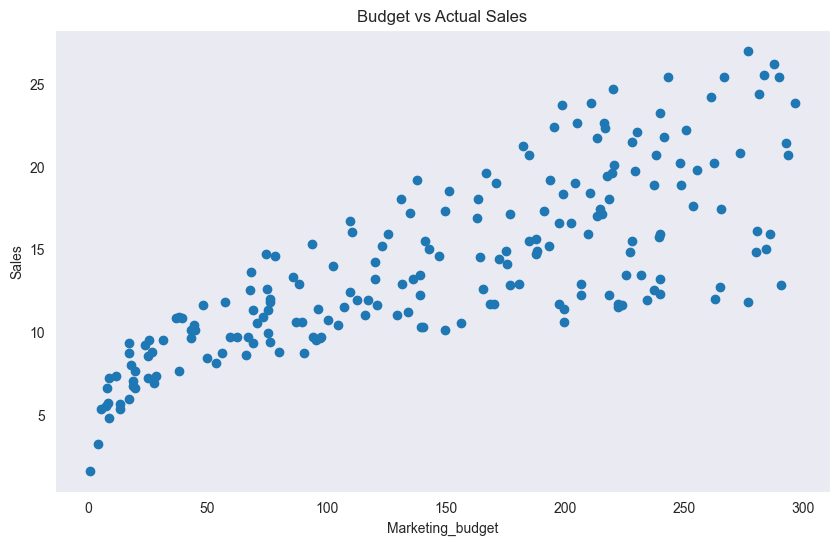

In [18]:
plt.figure(figsize = (10, 6))
sns.set_style("dark")
plt.xlabel("Marketing_budget")
plt.ylabel("Sales")
plt.title("Budget vs Actual Sales")
plt.scatter(data["marketing_budget"], data["Sales"])

In [19]:
# looks like there's quite a strong positive relationship between marketing budget and actual sales 




<p>We are trying to find a suitable equation to fit</p>


$$ Y \approx f(X) + \epsilon $$

<p>Where $Y$ is the observed output, $f$ is the function mapping budget to Sales, $ \epsilon $ is the Bayes Decision Error + reducible error</p>

<p>Rewriting, we can have </p>

$$ \hat{Y} = \hat{f}(X) + \epsilon $$

<p>Where $ \hat{Y} $ is the predicted output and X is the marketing budget</p>

<p> $ \hat{f}(X) $ can also be written as: </p>

$$ \hat{f}(X) = \beta_0 + m\beta_1 $$

<p>Thus we have </p>

$$ \hat{Y} = \beta_0 + m\beta_1 $$

<p>A good place to start fitting our line would be setting $\beta_0$ to the mean of sales, and $\beta_1$ to be 0</p>

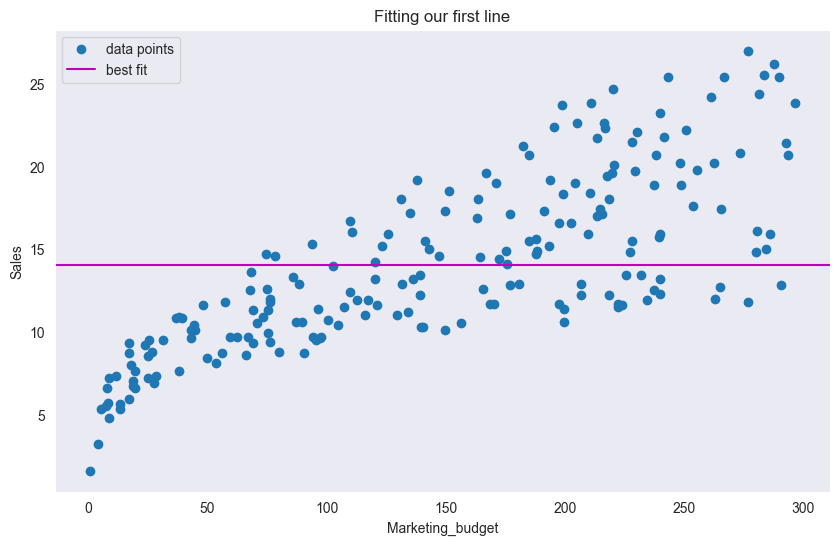

In [25]:
plt.figure(figsize = (10, 6))
sns.set_style("dark")
plt.xlabel("Marketing_budget")
plt.ylabel("Sales")
plt.title("Fitting our first line")
plt.scatter(data["marketing_budget"], data["Sales"], label = "data points")
plt.axhline(y = data["Sales"].mean(), color = "m", label = "best fit")
plt.legend()
plt.show()

<p>The sum of squared residuals($RSS$) is defined as </p>

$$ RSS = \sum_{i = 0}^{i = n - 1} (\hat{Y} - Y)^2 $$

<p>Here, our loss function for linear regression is $RSS$, hence we try to minimize this.</p>

Since 

$$ RSS = (\hat{Y}_0 - Y_0)^2 + (\hat{Y}_1 - Y_1)^2 + ... (\hat{Y}_{n - 1} - Y_{n - 1})^2 $$ 

Rewriting, 

$$ RSS = (\beta_0 + X_{0}\beta_1 - Y_0)^2 + (\beta_0 + X_{1}\beta_1 - Y_1)^2 + ... (\beta_0 + X_{n - 1}\beta_1 - Y_{n - 1})^2 $$ 

Which is equivalent to 

$$ RSS = \sum_{i = 0}^{i = n - 1}\frac{(X_{i} - \bar{X})(Y_{i} - \bar{Y})}{(X_{i} - \bar{X})^2} $$

Leaving our y-intercept, $ \beta_0 = \hat{Y} -  X\beta_1 $

In [63]:
data["Sales"].mean() # this is equivalent to beta0 


14.0225

In [61]:
def getRSSValue(intercept, mean):
    # 
    currentSum = 0 
    # for that particular budget_sales, whats the predicted sales?
    predictedArray = np.array([intercept + mean * data["marketing_budget"][i] for i in range(len(data))])
    sumOfSquared = np.square(predictedArray - data["Sales"])
    return sumOfSquared.sum()
    
res = getRSSValue(14, 0)

    
        

<p>What I can do is I can manually carry out gridSearchCV to estimate the best $ \beta_{0} ,  \beta_{1} $ </p>

In [79]:
# from the graph, its quite clear than I can fit +ve gradient with a y-intercept < sales.mean
# use GRID Search CV to generate the best data,

# probably could use stochastic gradient descent / reinforcement learning but im too noob for that now.

y_intercepts = np.arange(0, 14, 0.05)
means = np.arange(0, 2, 0.01)




In [82]:
def generateBestFit(y_intercepts, means):
    bestRSSValue = float("inf")
    beta_0 = None
    beta_1 = None
    for y_intercept in y_intercepts:
        for mean in means:
            currentScore = getRSSValue(y_intercept, mean)
            if bestRSSValue > currentScore:
                beta_0 = y_intercept
                beta_1 = mean
                bestRSSValue = currentScore
            
    return [bestRSSValue, beta_0, beta_1]


    

In [83]:
RSS, beta_0 , beta_1 = generateBestFit(y_intercepts, means)

In [84]:
print("RSS Score: {} ".format(RSS))
print("y-intercept: {} ".format(beta_0))
print("Mean: {} ".format(beta_1))

RSS Score: 2111.514475 
y-intercept: 6.65 
Mean: 0.05 


In [92]:
# lets try generating the new data 

data["predicted_sales"] = data.apply(lambda row: row.marketing_budget * beta_1 + beta_0, axis = 1)

In [93]:
data.head()

,marketing_budget,Sales,predicted_sales
0,230.1,22.1,18.155
1,44.5,10.4,8.875
2,17.2,9.3,7.510
3,151.5,18.5,14.225
4,180.8,12.9,15.690


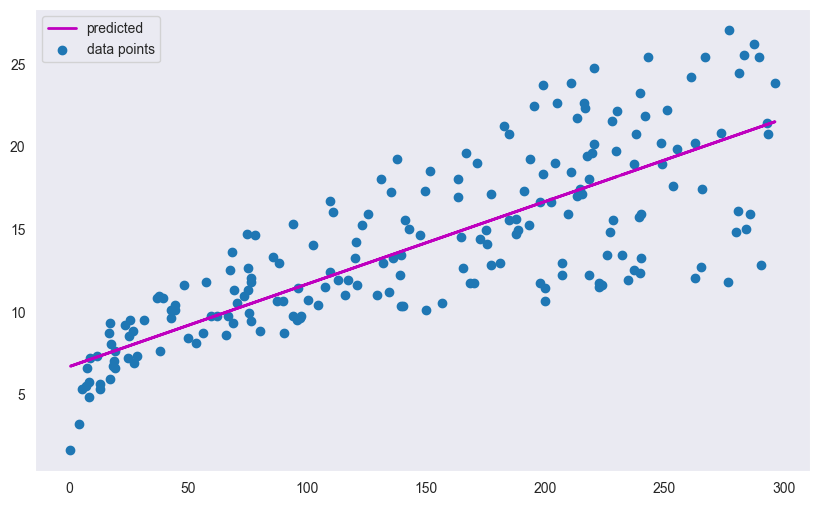

In [102]:
plt.figure(figsize = (10, 6))
plt.plot(data["marketing_budget"],data["predicted_sales"], "m", lw = 2.0, label = "predicted")

plt.scatter(data["marketing_budget"], data["Sales"], label = "data points")
plt.legend(loc = 0)

plt.show()

### VIOLA! We have our least squares best fit implemented manually

<p>Now, lets compare it with sklearn's library and see how far off we are </p>

In [126]:
from sklearn.linear_model import LinearRegression



predictor = LinearRegression()



In [127]:
x = np.array(data["marketing_budget"]).reshape(-1, 1)
y = np.array(data["Sales"]).reshape(-1,1)

In [128]:
predictor.fit(x, y)

LinearRegression()

In [129]:
print(
    "Predictor intercept: {}\n".format(round(float(predictor.intercept_), 2)),
    "Estimated intercept {}\n".format(beta_0),
    "Predictor gradient {}\n".format(round(float(predictor.coef_), 2)),
    "Estimated gradient {}\n".format(beta_1)

)


Predictor intercept: 7.03
 Estimated intercept 6.65
 Predictor gradient 0.05
 Estimated gradient 0.05



In [141]:
data["sk_predicted"] = predictor.predict(np.array(data["marketing_budget"]).reshape(-1,1))

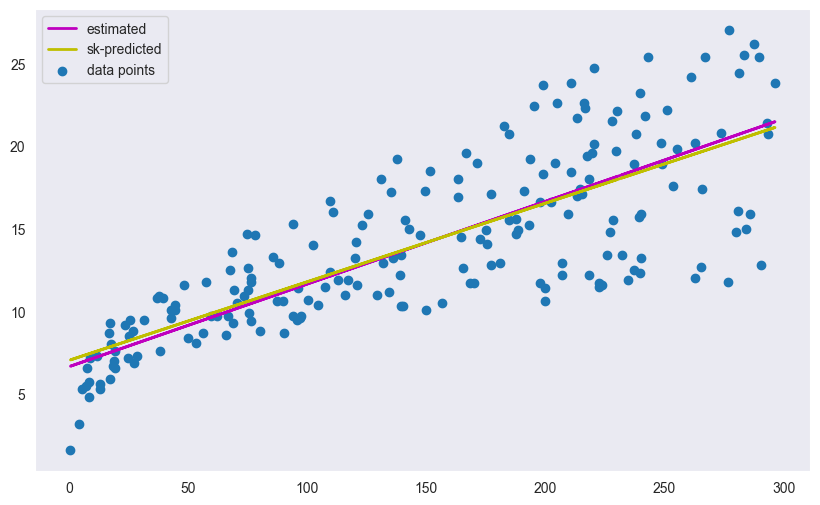

In [143]:
plt.figure(figsize = (10, 6))
plt.plot(data["marketing_budget"],data["predicted_sales"], "m", lw = 2.0, label = "estimated")
plt.plot(data["marketing_budget"],data["sk_predicted"], "y", lw = 2.0, label = "sk-predicted")
plt.scatter(data["marketing_budget"], data["Sales"], label = "data points")
plt.legend(loc = 0)

plt.show()

## There we go! Looks like its quite close to the best fit

<p> Looks like a win to me! 8D </p>